In [1]:
import numpy as np
import sys
import logging
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import corner

sys.path.append("..")

from simulator.spherical_simulator import simulator, true_logp

## 2d example

### Setup

In [59]:
latent_dim = 1
data_dim = 2
n = 100
epsilon = 0.01

phases = np.random.uniform(low=0., high=2.*np.pi, size=latent_dim)
widths = np.random.uniform(low=0.5, high=2., size=latent_dim)

In [60]:
phases, widths

(array([3.1956726]), array([1.35416442]))

### Generate data

In [61]:
x = simulator(epsilon, latent_dim, data_dim, n, phases, widths)

In [62]:
res = 251
x_range = np.linspace(-1.2,1.2,res)
y_range = np.linspace(-1.2,1.2,res)
xx, yy = np.meshgrid(x_range, y_range)
x_grid = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
logp_grid = true_logp(x_grid, epsilon, latent_dim, phases, widths).reshape((res, res))
logp_grid[~np.isfinite(logp_grid)] = -1000000.

### Plot

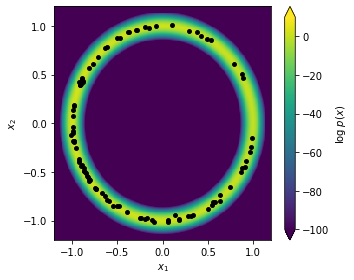

In [64]:
zmin, zmax = -100., 10.
fig = plt.figure(figsize=(5,4))
ax = plt.gca()

pcm = plt.pcolormesh(
    x_range, y_range,
    np.clip(logp_grid, zmin, zmax),
    cmap="viridis", norm=matplotlib.colors.Normalize(zmin, zmax)
)
cb = plt.colorbar(pcm, extend="both")
plt.scatter(x[:,0], x[:,1], s=15., c="black")

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
cb.set_label("$\log \; p(x)$")
plt.tight_layout()

plt.savefig("spherical_gaussian_2d.pdf")

## 8D example

In [65]:
latent_dim = 5
data_dim = 8
n = 100000
epsilon = 0.01

phases = np.random.uniform(low=0., high=2.*np.pi, size=latent_dim)
widths = np.random.uniform(low=0.5, high=2., size=latent_dim)

phases, widths

(array([4.8097734 , 0.49764513, 3.78435593, 6.19536663, 6.04142963]),
 array([0.64748731, 1.69209239, 0.87611775, 0.98831586, 1.35864521]))

In [66]:
x = simulator(epsilon, latent_dim, data_dim, n, phases, widths)

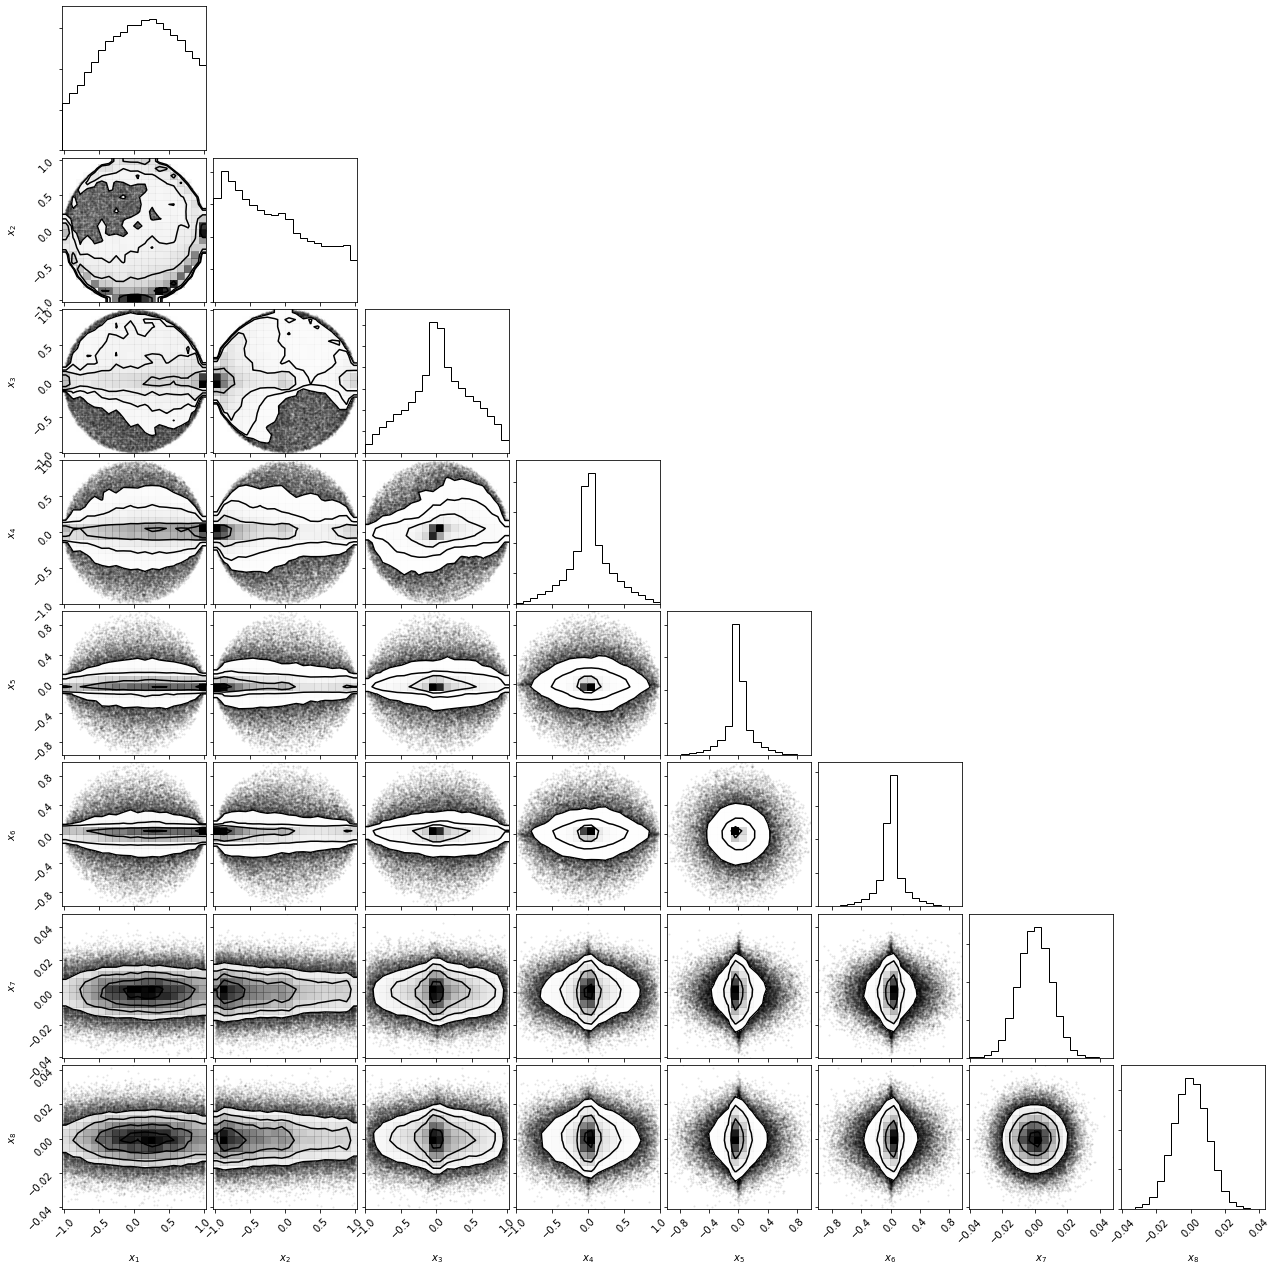

In [67]:
_ = corner.corner(x, labels=["$x_{}$".format(i+1) for i in range(data_dim)])

plt.savefig("spherical_gaussian_8d.pdf")